In [107]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
from seaborn import lmplot
from seaborn import kdeplot
from seaborn import distplot

In [ ]:
#añade hue= en la amyoría de las gráficas

In [116]:
df_archivo = pd.read_csv('definitivo.csv', index_col= 0)
df_archivo.head(2)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href,fatal_(y/n),injury,date
0,1800.00.00,1800.0,Unprovoked,SEYCHELLES,St. Anne,NaN,a corsair's boat was overturned,NaN,F,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Y,"FATAL, all onboard were killed by sharks",1800
1,1797.05.28.R,1797.0,Unprovoked,NaN,NaN,NaN,Dropped overboard,child,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Y,FATAL,Reported May-28-1797


In [53]:
# Crea una gráfica de barras que muestre el número de personas que han hecho una actividad en cada año solo desde el 2015
actividad_año = pd.DataFrame(df_archivo.groupby(['activity', 'year'])['case_number'].count()).reset_index()
actividad_año


,activity,year,case_number
0,,1900.0,1
1,,1993.0,1
2,a canoe was pursuing a schooner that had forc...,1892.0,1
3,"""Boat accident""",1895.0,1
4,"""Climbing up to ship after repairing the stern...",1958.0,1
...,...,...,...
3030,ship torpedoed 400 miles off the African coas....,1943.0,1
3031,small boat,1893.0,1
3032,wreck of the State Oil Company ship Permina,1966.0,1
3033,yachting accident,1884.0,1


In [54]:
actividad_año_2015 = actividad_año[actividad_año['year'] > 2015.0]
actividad_año_2015

,activity,year,case_number
18,2 boats capsized,2017.0,1
100,Attempting to lasso a shark,2017.0,1
297,Body boarding,2016.0,1
298,Body boarding,2017.0,6
299,Body boarding,2018.0,1
...,...,...,...
2927,Walking,2016.0,2
2928,Walking,2018.0,2
2952,Washing hands,2017.0,1
2981,Windsurfing,2016.0,1


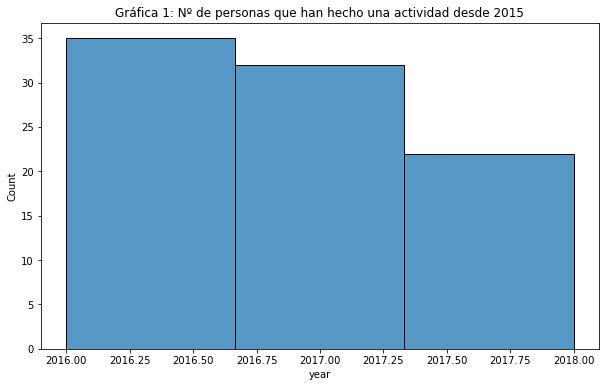

In [70]:
# Crea una gráfica de barras que muestre el número de personas que han hecho una actividad en cada año solo desde el 2015
plt.figure(figsize=(10,6))              #x = year; y=case_number
grafica_1 = sns.histplot(x=actividad_año_2015['year'], data=actividad_año_2015, bins=3).set(title='Gráfica 1: Nº de personas que han hecho una actividad desde 2015')


In [85]:
# Crea una gráfica de barras que muestre el número de ataques que han ocurrido cada año en función del sexo solo desde el 2015
sexo_año = pd.DataFrame(df_archivo.groupby(['sex_', 'year'])['case_number'].count()).reset_index()
sexo_año.sample()

,sex_,year,case_number
300,M,1972.0,27


In [86]:
ataque_2015 = sexo_año[sexo_año['year'] > 2015.0]
ataque_2015

,sex_,year,case_number
109,F,2016.0,21
110,F,2017.0,40
111,F,2018.0,6
344,M,2016.0,105
345,M,2017.0,91
346,M,2018.0,46


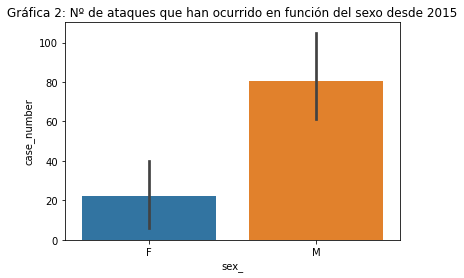

In [87]:
grafica_2 = sns.barplot(x='sex_', y='case_number', data=ataque_2015).set(title='Gráfica 2: Nº de ataques que han ocurrido en función del sexo desde 2015')  #hue=sex_, 

In [89]:
# ¿Cuántos ataques hubo por año? Seleccionad solo desde el año 1500
ataque_año = pd.DataFrame(df_archivo.groupby(['year'])['case_number'].count()).reset_index()
ataque_año

,year,case_number
0,0.0,125
1,5.0,1
2,77.0,1
3,500.0,1
4,1543.0,1
...,...,...
244,2014.0,126
245,2015.0,143
246,2016.0,130
247,2017.0,136


In [91]:
ataque_1500 = ataque_año[ataque_año['year'] > 1500.0]
ataque_1500

,year,case_number
4,1543.0,1
5,1554.0,1
6,1555.0,1
7,1580.0,1
8,1595.0,1
...,...,...
244,2014.0,126
245,2015.0,143
246,2016.0,130
247,2017.0,136


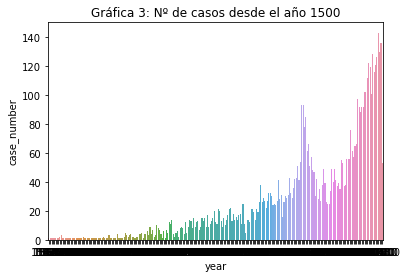

In [93]:
grafica_3 = sns.barplot(x='year', y='case_number', data=ataque_1500).set(title='Gráfica 3: Nº de casos desde el año 1500')

In [98]:
# Seleccionad solo los registros de USA, AUSTRALIA y SOUTH AFRICA. Muestra el número de ataques por país y año desde el año 1900. lineplot(ejercicio este y siguiente)
filtrado_pais = df_archivo[(df_archivo['country'] == 'USA') | (df_archivo['country'] == 'AUSTRALIA') | (df_archivo['country'] == 'SOUTH AFRICA')]
ataque_pais = filtrado_pais.groupby(['year'])['case_number'].count().reset_index()
ataque_1900 = ataque_pais[ataque_pais['year'] > 1900.0]

,year,case_number
82,1901.0,4
83,1902.0,8
84,1903.0,6
85,1904.0,5
86,1905.0,13
...,...,...
195,2014.0,100
196,2015.0,114
197,2016.0,100
198,2017.0,95


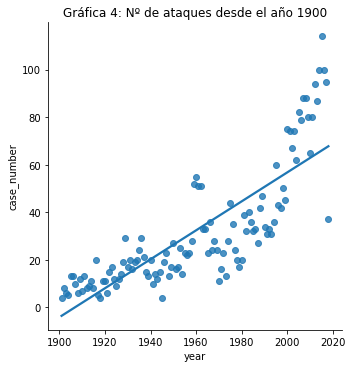

In [115]:
grafica_4 = lmplot(x='year', y='case_number', data=ataque_1900, ci=None).set(title='Gráfica 4: Nº de ataques desde el año 1900')

In [2]:
# Realizad un boxplot donde se muestre los principales estadísticos del número de ataques por país